In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# sets the backend of matplotlib to the 'inline' backend; 
#With this backend, the output of plotting commands is displayed inline within frontends 
#like the Jupyter notebook, directly below the code cell that produced it. 
#The resulting plots will then also be stored in the notebook document.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [0]:
#generate random data points and define linear relation

x_data = np.random.randn(50).astype(np.float32)

In [0]:
# Let the equation for the model be =>  Y = 3X + 5

y_data = 3*x_data + 5 
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [0]:
# Set a, b randonly and define linear function

a = tf.Variable(1.0)
b = tf.Variable(4.0)

y = a * x_data + b

In [0]:
# In linear regression we minimize the squared error of the equation
# tf.reduce_mean() - find loss value
# Find mean of a multi-dimensional tensor and result can have diff. dimension.

loss = tf.reduce_mean(tf.square(y - y_data))

In [0]:
# optimizer function - using gradient desent and finally train the graph

# Considering learning rate as 0.5
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [0]:
# initialize the variables before executing the graph 

init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

In [12]:
# optimize and run the graph
train_data = []
for steps in range(50):
  evals = session.run([train, a, b])[1:]
  if steps % 5  == 0:
    print(steps, evals)
    train_data.append(evals)

(0, [2.5108538, 5.067935])
(5, [2.9969218, 4.969865])
(10, [2.9977078, 4.969725])
(15, [2.9977093, 4.9697247])
(20, [2.9977093, 4.9697247])
(25, [2.9977093, 4.9697247])
(30, [2.9977093, 4.9697247])
(35, [2.9977093, 4.9697247])
(40, [2.9977093, 4.9697247])
(45, [2.9977093, 4.9697247])


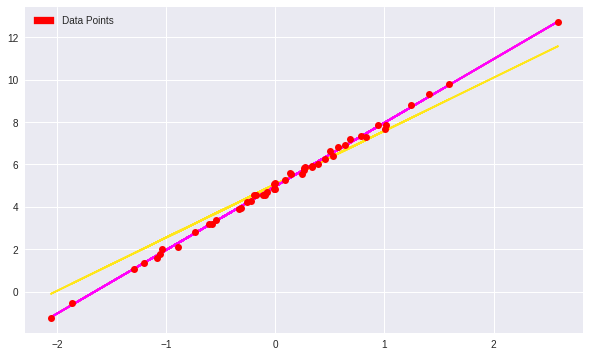

In [15]:
# Plot the graph 

converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()